## REKKO Challenge

https://boosters.pro/championship/rekko_challenge

В соревновании по машинному обучению REKKO Challenge некоторые данные анонимизированы. Например данные о времени событий приведены к "абстрактным единицам, для которых сохранено расстояние и отношение порядка".

Давайте посмотрим как можно деанонимизировать эти данные и извлечь признаки для алгоритмов машинного обучения.

#### Загрузим необходимые пакеты и прочитаем данные

In [1]:
import pandas as pd
import numpy as np
import json
import os

%matplotlib inline

In [2]:
DATA_PATH = 'data'

Все расчеты будут на примере файла транзакций.

In [3]:
transactions = pd.read_csv(os.path.join(DATA_PATH, 'transactions.csv'))

In [4]:
transactions.head()

,element_uid,user_uid,consumption_mode,ts,watched_time,device_type,device_manufacturer
0,3336,5177,S,4.430518e+07,4282,0,50
1,481,593316,S,4.430518e+07,2989,0,11
2,4128,262355,S,4.430518e+07,833,0,50
3,6272,74296,S,4.430518e+07,2530,0,99
4,5543,340623,P,4.430518e+07,6282,0,50


В колонке ts содержится время совершенной транзакции. Построим гистограмму, которая покажет распределение транзакций во времени.

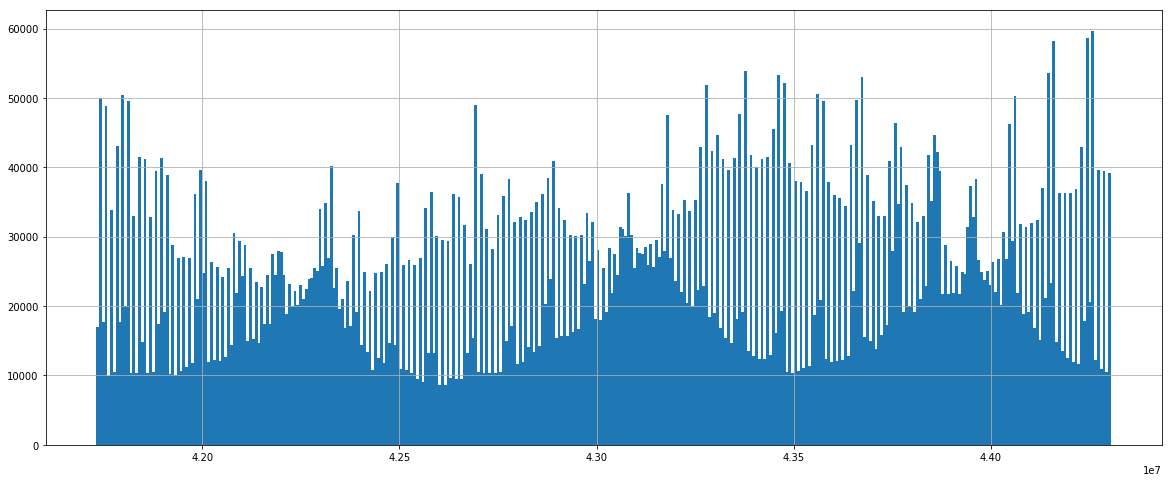

In [5]:
bins = 365
transactions.ts.hist(bins=bins, figsize=[20, 8])

Видны некие паттерны, но однозначные выводы пока сделать нельзя, поэтому напишем функцию, которая поможет проверить различные гипотезы.

In [6]:
def plotting_ts_histogram(df, n_periods, start_hist, finish_hist):
    # df - DataFrame с исходными данными
    # n_periods - предполагаемое количество периодов (например дней) в исходных данных
    # start_hist - начальный период для построения гистограммы
    # finish_hist - конечный период для построения гистограммы
    max_ts = df.ts.max()
    min_ts = df.ts.min()
    delta_ts = (max_ts - min_ts)
    period_len = int(delta_ts / n_periods)
    left_margin = min_ts + period_len * start_hist
    right_margin = min_ts + period_len * finish_hist
    df[(df.ts > left_margin) & (df.ts < right_margin)].ts.hist(bins=600, figsize=[20, 8])

Итак, исходим из гипотезы, что в transaction содержатся данные за год. Построим гистограмму за первые 20 "дней".

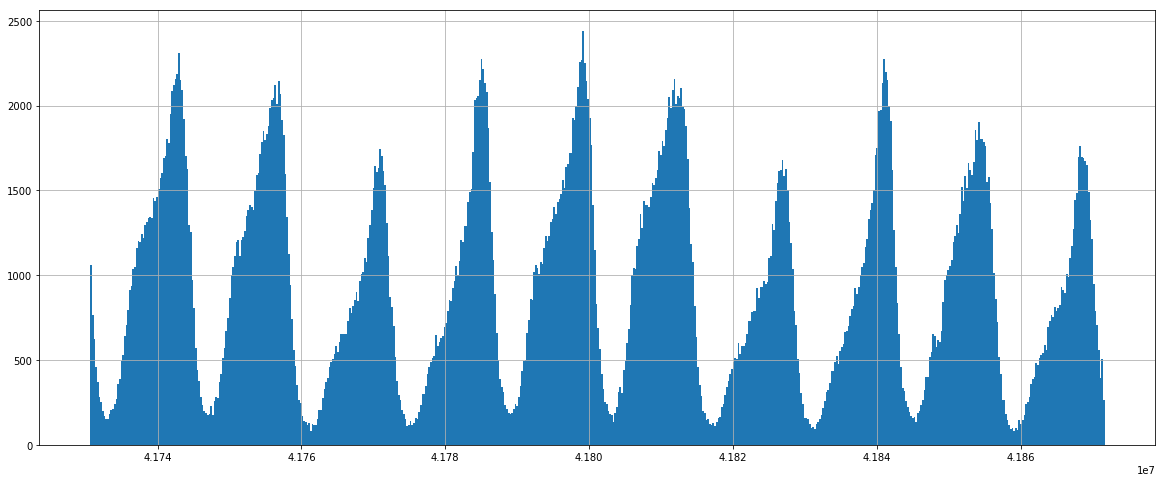

In [7]:
plotting_ts_histogram(transactions, 365, 0, 20)

На гистограмме проявились дни, только их оказалось не 20, а 10. Уменьшим n_periods в 2 раза.

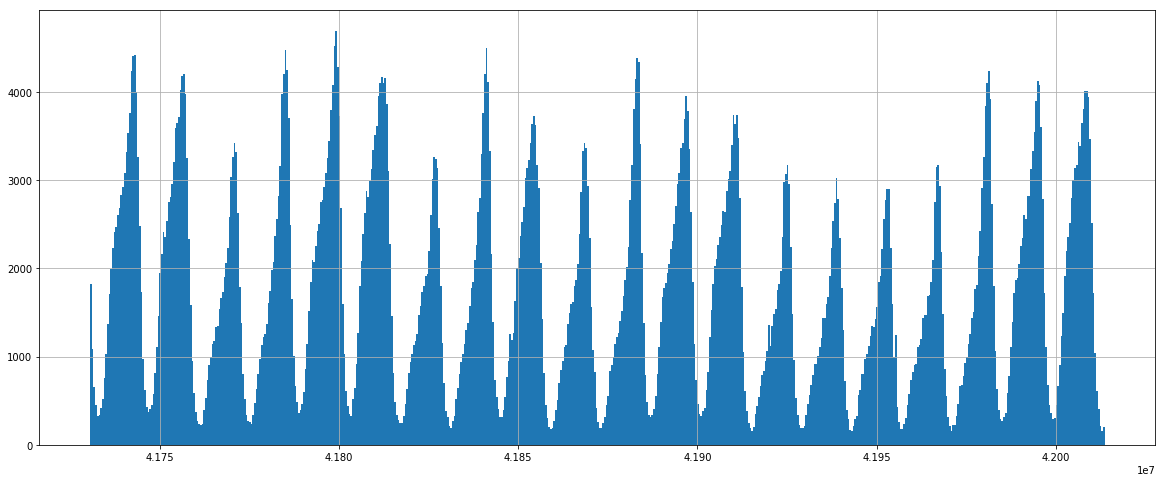

In [8]:
plotting_ts_histogram(transactions, 182, 0, 20)

Отлично. Мы задали отображение 20 периодов и увидели 20 "пиков" на графике. Проверим более поздние данные.

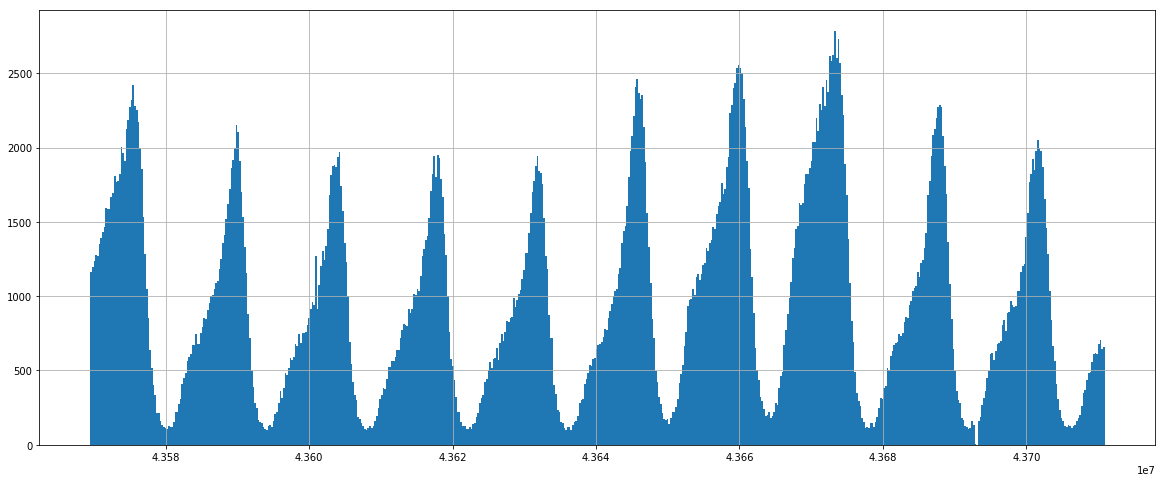

In [9]:
plotting_ts_histogram(transactions, 182, 130, 140)

При взгляде на левую границу графика видно, что граница между днями сместилась с окончания предыдущего дня на начало следующего. Значит мы выбрали маленькое значение n_periods и длина периода получилась чуть больше чем день. Попробуем значение n_periods=184

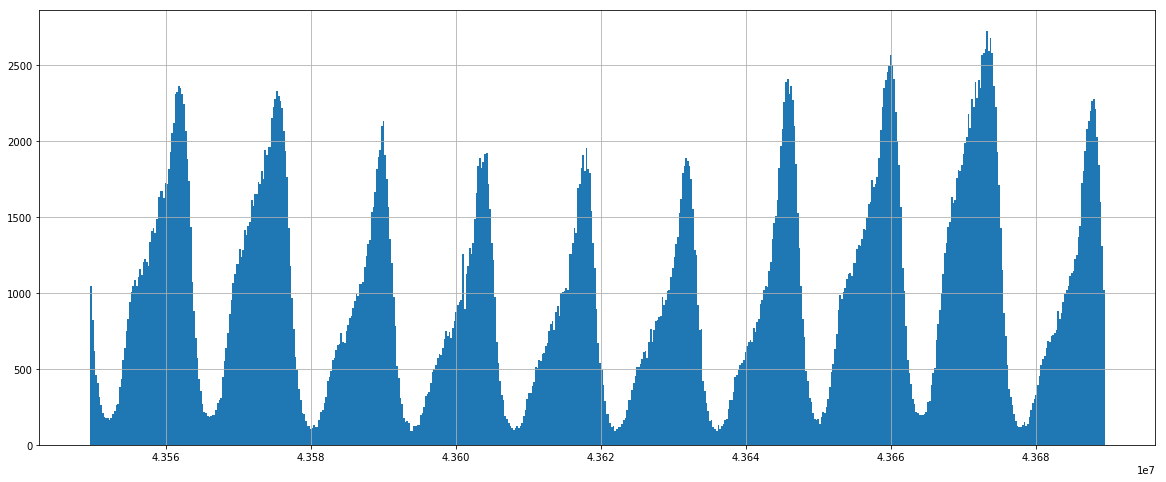

In [10]:
plotting_ts_histogram(transactions, 184, 130, 140)

Проверим на последних днях.

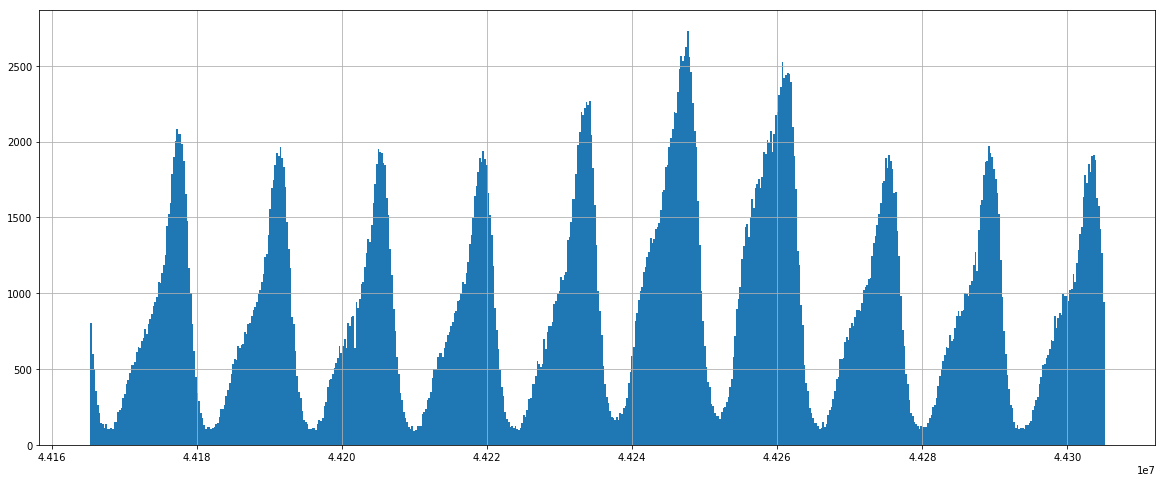

In [11]:
plotting_ts_histogram(transactions, 184, 174, 184)

Всё выглядит отлично, значит мы можем принять гипотезу, что в файле transactions содержатся данные за 184 дня (возможно +- несколько часов). На основе этой информации можно сгенерировать такие пользовательские признаки, как дни/часы просмотра контента. Приглядитесь к высоте пиков - на многих графиках виден паттерн "четыре низких пика/три высоких" - скорее всего это понедельник-четверг/пятница-воскресенье.

Успехов!